In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import scipy as sp
import sklearn
import sys

from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
from scipy import linalg

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [3]:
df=pd.read_csv('카폐 크롤링 질문40000.csv')
df

,df_sum,comments_sum
0,그루밍 할때 깨물깨물저희 둘째가 그루밍을 할때\n혀로 빗고 털을 앙앙앙 깨물깨물 하...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
1,고양이 토 색좀 봐주세요 ㅠㅠ오늘 퇴근하고 털같은걸 토했길래 상황을 지켜봤는데 잘 ...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
2,다들 냥이들 보통 얼마나 자나요?저희 냥이가 길에서 살다가 약 2주 전부터 저희 집...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
3,제가 식중독 걸렸는데 애기 괜찮을까요 ㅜㅜ식중독은 처음 걸려보네요 ㅜㅜ\n고양이랑 ...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
4,고양이 귀염증 잘아시는분ㅠ..5마리 집사입니당 그중 한마리 고양이 귀 염증이 심하길...,['자이목스 블루 써보세요 \n좀 비싸지만 효과는 좋아요']['가격이 사악하긴하네욤...
...,...,...
42376,편백나무액 냥이들에게 괜찮을까요?캣초딩 두마리 집사에요^^\n편백나무액을 구매했는데...,['백합은 사람한테도 위험한 식물이기도 해요~']['저 타고양이카페에서 받은거에요!...
42377,마당냥이 때문에 고민이 많습니다지난 여름부터 사료나 간식을 챙겨주던 냥이가 잇었는데...,['공쥬님. 마니걱정되시는거 그맘알것같아요.\n젤좋은건 포획하셔서 중성화해주시구.\...
42378,놀다가 털썩 눕는행동 ? 4개월아가인데 사냥놀이하다가 갑자기 저렇게 털썩 누워요 \...,['나름 노는행동아닐까여^^\n저희냥이도 그래여~^^;\n전 저희냥이가 캣초딩아니고...
42379,"숨숨집, 캣타워 전혀 사용을 안해요. ㅜㅜ4개월 아깽이 입니다... 캣타워 숨숨집 ...",['아요~~이뻐라\n좀 지나면 쓸거예요']['과연... 언제부터 쓸까요.. ㅜㅜ ...


In [4]:
df

,df_sum,comments_sum
0,그루밍 할때 깨물깨물저희 둘째가 그루밍을 할때\n혀로 빗고 털을 앙앙앙 깨물깨물 하...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
1,고양이 토 색좀 봐주세요 ㅠㅠ오늘 퇴근하고 털같은걸 토했길래 상황을 지켜봤는데 잘 ...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
2,다들 냥이들 보통 얼마나 자나요?저희 냥이가 길에서 살다가 약 2주 전부터 저희 집...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
3,제가 식중독 걸렸는데 애기 괜찮을까요 ㅜㅜ식중독은 처음 걸려보네요 ㅜㅜ\n고양이랑 ...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
4,고양이 귀염증 잘아시는분ㅠ..5마리 집사입니당 그중 한마리 고양이 귀 염증이 심하길...,['자이목스 블루 써보세요 \n좀 비싸지만 효과는 좋아요']['가격이 사악하긴하네욤...
...,...,...
42376,편백나무액 냥이들에게 괜찮을까요?캣초딩 두마리 집사에요^^\n편백나무액을 구매했는데...,['백합은 사람한테도 위험한 식물이기도 해요~']['저 타고양이카페에서 받은거에요!...
42377,마당냥이 때문에 고민이 많습니다지난 여름부터 사료나 간식을 챙겨주던 냥이가 잇었는데...,['공쥬님. 마니걱정되시는거 그맘알것같아요.\n젤좋은건 포획하셔서 중성화해주시구.\...
42378,놀다가 털썩 눕는행동 ? 4개월아가인데 사냥놀이하다가 갑자기 저렇게 털썩 누워요 \...,['나름 노는행동아닐까여^^\n저희냥이도 그래여~^^;\n전 저희냥이가 캣초딩아니고...
42379,"숨숨집, 캣타워 전혀 사용을 안해요. ㅜㅜ4개월 아깽이 입니다... 캣타워 숨숨집 ...",['아요~~이뻐라\n좀 지나면 쓸거예요']['과연... 언제부터 쓸까요.. ㅜㅜ ...


In [5]:
df['comments_sum'] = df['comments_sum'].apply(str)
type(df.comments_sum)

pandas.core.series.Series

In [6]:
df['df_sum'] = df['df_sum'].apply(str)

In [7]:
df['all_text']=df['df_sum']+df['comments_sum']
df

,df_sum,comments_sum,all_text
0,그루밍 할때 깨물깨물저희 둘째가 그루밍을 할때\n혀로 빗고 털을 앙앙앙 깨물깨물 하...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...,그루밍 할때 깨물깨물저희 둘째가 그루밍을 할때\n혀로 빗고 털을 앙앙앙 깨물깨물 하...
1,고양이 토 색좀 봐주세요 ㅠㅠ오늘 퇴근하고 털같은걸 토했길래 상황을 지켜봤는데 잘 ...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...,고양이 토 색좀 봐주세요 ㅠㅠ오늘 퇴근하고 털같은걸 토했길래 상황을 지켜봤는데 잘 ...
2,다들 냥이들 보통 얼마나 자나요?저희 냥이가 길에서 살다가 약 2주 전부터 저희 집...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...,다들 냥이들 보통 얼마나 자나요?저희 냥이가 길에서 살다가 약 2주 전부터 저희 집...
3,제가 식중독 걸렸는데 애기 괜찮을까요 ㅜㅜ식중독은 처음 걸려보네요 ㅜㅜ\n고양이랑 ...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...,제가 식중독 걸렸는데 애기 괜찮을까요 ㅜㅜ식중독은 처음 걸려보네요 ㅜㅜ\n고양이랑 ...
4,고양이 귀염증 잘아시는분ㅠ..5마리 집사입니당 그중 한마리 고양이 귀 염증이 심하길...,['자이목스 블루 써보세요 \n좀 비싸지만 효과는 좋아요']['가격이 사악하긴하네욤...,고양이 귀염증 잘아시는분ㅠ..5마리 집사입니당 그중 한마리 고양이 귀 염증이 심하길...
...,...,...,...
42376,편백나무액 냥이들에게 괜찮을까요?캣초딩 두마리 집사에요^^\n편백나무액을 구매했는데...,['백합은 사람한테도 위험한 식물이기도 해요~']['저 타고양이카페에서 받은거에요!...,편백나무액 냥이들에게 괜찮을까요?캣초딩 두마리 집사에요^^\n편백나무액을 구매했는데...
42377,마당냥이 때문에 고민이 많습니다지난 여름부터 사료나 간식을 챙겨주던 냥이가 잇었는데...,['공쥬님. 마니걱정되시는거 그맘알것같아요.\n젤좋은건 포획하셔서 중성화해주시구.\...,마당냥이 때문에 고민이 많습니다지난 여름부터 사료나 간식을 챙겨주던 냥이가 잇었는데...
42378,놀다가 털썩 눕는행동 ? 4개월아가인데 사냥놀이하다가 갑자기 저렇게 털썩 누워요 \...,['나름 노는행동아닐까여^^\n저희냥이도 그래여~^^;\n전 저희냥이가 캣초딩아니고...,놀다가 털썩 눕는행동 ? 4개월아가인데 사냥놀이하다가 갑자기 저렇게 털썩 누워요 \...
42379,"숨숨집, 캣타워 전혀 사용을 안해요. ㅜㅜ4개월 아깽이 입니다... 캣타워 숨숨집 ...",['아요~~이뻐라\n좀 지나면 쓸거예요']['과연... 언제부터 쓸까요.. ㅜㅜ ...,"숨숨집, 캣타워 전혀 사용을 안해요. ㅜㅜ4개월 아깽이 입니다... 캣타워 숨숨집 ..."


In [8]:
import re

In [9]:
def clean_text(text):
    text = re.sub('http[s]?://\S+', '', text) # http url 제거
    text = re.sub('\S*@\S*\s?', '', text) # 기자 emails 제거
    #text = re.sub(r'\[.*?\]', '', text) # 대괄호안에 텍스트 제거 : 뉴스이름 + 기자이름
    text = re.sub(r'\w*\d\w*', '', text) # 숫자 포함하는 텍스트 제거
    text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)#특수문자 이모티콘 제거
    text = re.sub("\n", '', text) #개행문자 제거
    text = re.sub("\xa0", '', text) #개행문자 제거
    text = re.sub(r'Copyright .* rights reserved', '', text) # "Copyright all rights reserved" 제거
    return text

In [10]:
df["text_clean"]= pd.DataFrame(df.all_text.apply(lambda x: clean_text(x)))
#DataFrame.apply() 函数会遍历每一个元素，对元素运行指定的 function。

In [11]:
df.text_clean

0        그루밍 할때 깨물깨물저희 둘째가 그루밍을 할때혀로 빗고 털을 앙앙앙 깨물깨물 하는데...
1        고양이 토 색좀 봐주세요 ㅠㅠ오늘 퇴근하고 털같은걸 토했길래 상황을 지켜봤는데 잘 ...
2        다들 냥이들 보통 얼마나 자나요저희 냥이가 길에서 살다가 약  전부터 저희 집에 와...
3        제가 식중독 걸렸는데 애기 괜찮을까요 ㅜㅜ식중독은 처음 걸려보네요 ㅜㅜ고양이랑 저랑...
4        고양이 귀염증 잘아시는분ㅠ 집사입니당 그중 한마리 고양이 귀 염증이 심하길래 병원 ...
                               ...                        
42376    편백나무액 냥이들에게 괜찮을까요캣초딩 두마리 집사에요편백나무액을 구매했는데 향도 좀...
42377    마당냥이 때문에 고민이 많습니다지난 여름부터 사료나 간식을 챙겨주던 냥이가 잇었는데...
42378    놀다가 털썩 눕는행동   사냥놀이하다가 갑자기 저렇게 털썩 누워요 그러다 장난감흔들...
42379    숨숨집 캣타워 전혀 사용을 안해요  아깽이 입니다 캣타워 숨숨집 등 전혀 사용을 안...
42380                                  외동묘인데 캣폴 괜찮을까요[]nan
Name: text_clean, Length: 42381, dtype: object

### 형태소분석

In [12]:
from konlpy.tag import Okt

In [13]:
okt = Okt()
texts_ko = [okt.morphs(doc) for doc in df.text_clean]#morphs 将短语解析为语素
print(texts_ko[0])

['그루밍', '할', '때', '깨물', '깨물', '저희', '둘째', '가', '그루밍', '을', '할', '때혀', '로', '빗고', '털', '을', '앙', '앙', '앙', '깨물', '깨물', '하는데', '괜찮은', '거', '겠죠', '피', '가', '나거나', '하진', '않아요', '근데', '깨물', '깨물', '하니까', '좀', '걱정', '이에요', 'NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone']


In [14]:
text_noun = [okt.nouns(doc) for doc in df.text_clean]#名词提取器
print(text_noun[0])

['그루밍', '때', '저희', '둘째', '그루밍', '때혀', '털', '거', '피', '하진', '좀', '걱정']


### 불용어제거

In [60]:
import json
with open('korean_stopwords (1).json', encoding='UTF8') as f:
    stopwords = json.load(f)
    
stopwords.extend(['에서','고','이다','는','한','씨','고양이','요','더','냥','거','지금','한번','정도','그냥','전','첫째','둘째'])

In [61]:
df['text_tokenized'] = text_noun

In [62]:
df['text_tokenized'] = df.text_tokenized.apply(lambda x: [a for a in x if a not in stopwords])

In [63]:
df.text_tokenized

0                             [그루밍, 그루밍, 때혀, 털, 피, 하진, 걱정]
1        [토, 색좀, 오늘, 퇴근, 털, 토, 상황, 저녁, 사냥, 토, 크게, 색, 살짝...
2        [보통, 길, 약, 집, 밖, 장난감, 해도, 집, 장난감, 최대한, 애가, 잠, ...
3        [식중독, 애기, 식중독, 처음, 단둘, 주말, 부모님, 남동생, 집, 집, 근처,...
4        [염증, 분, 집사, 마리, 귀, 염증, 병원, 귀, 진드기, 염증, 병원, 치료,...
                               ...                        
42376    [편백나무, 액, 캣, 초딩, 마리, 집사, 편백나무, 액, 구매, 향, 걱정, 몇...
42377    [마당, 때문, 고민, 지난, 여름, 사료, 간식, 집, 마당, 매일, 덩, 치가,...
42378    [털썩, 행동, 사냥, 갑자기, 털썩, 장난감, 다시, 사냥, 털썩, 반복, 이제,...
42379    [숨, 캣타워, 전혀, 사용, 안해, 깽, 캣타워, 숨, 전혀, 사용, 바닥, 폴드...
42380                                          [외동, 묘, 캣폴]
Name: text_tokenized, Length: 42381, dtype: object

### 워드클라우드

In [64]:
def flatten(l): #flatten降维函数
    flatlist= []
    for elem in l:
        if type(elem) == list:#flatten只能适用于numpy对象，即array或者mat，普通的list列表不适用！
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist### 워드클라우드

In [65]:
data1 = df.text_tokenized.tolist()#tolist()将矩阵（matrix）和数组（array）转化为列表list
data2 = flatten(data1)
data2[:20]

['그루밍',
 '그루밍',
 '때혀',
 '털',
 '피',
 '하진',
 '걱정',
 '토',
 '색좀',
 '오늘',
 '퇴근',
 '털',
 '토',
 '상황',
 '저녁',
 '사냥',
 '토',
 '크게',
 '색',
 '살짝']

In [66]:
text = nltk.Text(data2)
text[:20]

['그루밍',
 '그루밍',
 '때혀',
 '털',
 '피',
 '하진',
 '걱정',
 '토',
 '색좀',
 '오늘',
 '퇴근',
 '털',
 '토',
 '상황',
 '저녁',
 '사냥',
 '토',
 '크게',
 '색',
 '살짝']

In [67]:
len(text)

2953750

In [68]:
! pip  install wordcloud

In [69]:
from wordcloud import WordCloud

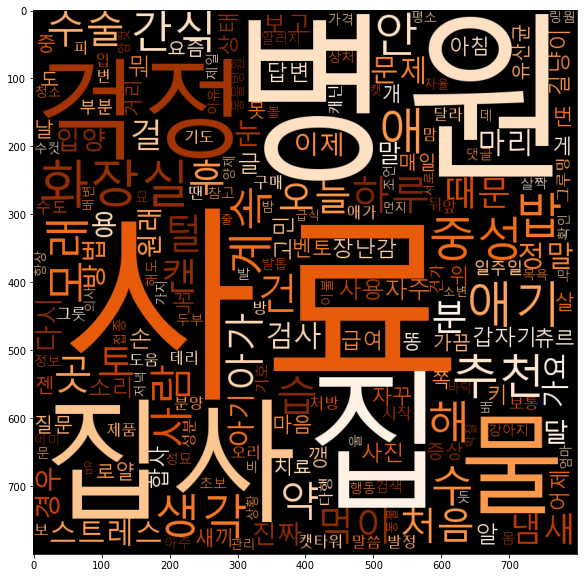

In [70]:
font_path = "‪C:\Windows\Fonts\malgun.ttf"
wordclouds =WordCloud(font_path ="‪C:\Windows\Fonts\malgun.ttf",
                      width = 800,
                      height= 800,
                      background_color = 'Black',
                      colormap = 'Oranges')

from collections import Counter
count = Counter(text)#返回一个代表计数器的当前值的字符串。#list和dict类型是unhashable（不可哈希）的。
wordclouds =wordclouds.generate_from_frequencies(count)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordclouds.to_array())
plt.show()

In [71]:
type(count)

collections.Counter

In [72]:
count = dict(count)

In [73]:
count=pd.Series(count)
pd.DataFrame(count).sort_values(0, ascending=False)

,0
사료,47924
병원,37548
집,25433
집사,21481
걱정,17261
...,...
타래,1
동화책,1
비때매,1
집힌,1


In [29]:
del data1[7839]
del data1[11421]
del data1[11906]
del data1[34421]

In [30]:
data3 =[]

for i in data1:
    string = i[0]
    for w in i[1:]:#从1开始截取，不包括1
        string += " "
        string += w #w新建只写
    data3.append(string)
data3

['그루밍 둘째 그루밍 때혀 털 피 하진 걱정',
 '토 색좀 오늘 퇴근 털 토 상황 저녁 사냥 토 크게 색 살짝 초록 노란색 걱정 사료 사료 토인 상황 병원 금식 아침 보라 터널',
 '보통 길 약 전 집 밖 장난감 해도 집 장난감 최대한 애가 잠 원래 집 말 집 건가 생각 집 흥미 거리 다다 자주 안 범위 애가 생각 밖 종종 집 수면시간 대략',
 '식중독 애기 식중독 처음 단둘 주말 부모님 남동생 집 집 근처 집 갈비 육회 육회 아빠 분 장염 오늘 통화 어쩐지 약국 장염 약사 오늘 병원 웬걸 코로나 검사 진료 제대로 집 자가 격리 음성 내일 병원 진료 내일 하니 내 월급 애기 캔 돈 말 식중독 오늘 물 끼 날씨 오락가락 옷 음식 주의',
 '염증 분 집사 마리 귀 염증 병원 귀 진드기 염증 병원 치료 처방약 동네 동물병원 아침 저녁 맥 저녁 병원 정제 점차 다시 다시 번가 치료 약 맥 기미 병원 차 타고 가야 자가용 택시 타고 가기 택시 기사 경험 인터넷 구매 아시 분 있나욤 병원 오시 반항 수면 마취 수면 마취 피하 아시 분 댓글 욤 이목 스 블루 효과 가격 욤 집 정제두 해외 직구 정보',
 '병원 후 원래 발톶 집 정돈 전 종합 검진 발톶깎 발톱 걸 요원 병원 간식 아인 데 본적 발톱 시도 평소 둥순둥 해 검진 기억 발톱 안깎웅 순',
 '방법 캣터널 아래쪽 에두 모기 캣타워 통해',
 '일원동 임재성 동물 의료 센터 가보 신분 일원동 임재성 동물 의료 센터 거기 데리 분',
 '방충 망 발톱 하나요 데리 병원 방문 집안 안전 신경 방묘창방묘문 설치 필히 추락 사고 부주의 관리 병원 엑스레이 보고 이건 병원',
 '임신 길냥이 고양 이용 캔 참치 게살 쉐프 스페셜 주문 임신 애도',
 '중성 수술 자국 수술 한지 관리 대해 얘기 뭘 오늘 환묘복 레깅스 만 살짝 별 문제 둘째 수술 후 사진 털 수술 부위 밀고 집사 애기 상처 덜 보이 딱지 라면 건 나중 수술 병원 사진 확인 애기 순간 덧 수술 부위 소독 주시 부위 딱지 절로',
 '배변 통 모래 전체

In [31]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(data3)#训练，构建词汇表以及词项idf值，并将输入文本列表转成VSM矩阵形式.该方法在计算出数据变换方式之后对输入x就地转换。

### LDA

In [74]:
from gensim import corpora, models#语料库
#做映射，相当于词袋
dictionary = corpora.Dictionary(data1)
corpus = [dictionary.doc2bow(text) for text in data1]### LDA

In [75]:
corpus[:1]

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1)]]

In [100]:
lda = gensim.models.ldamodel.LdaModel(corpus,num_topics=15,
                                      id2word = dictionary)

In [101]:
lda.print_topics(num_words=8)

[(0,
  '0.044*"병원" + 0.041*"검사" + 0.016*"접종" + 0.013*"집" + 0.011*"항체" + 0.009*"곳" + 0.008*"걱정" + 0.007*"심장"'),
 (1,
  '0.092*"사료" + 0.037*"캔" + 0.032*"습" + 0.030*"간식" + 0.024*"건" + 0.014*"하루" + 0.012*"밥" + 0.012*"물"'),
 (2,
  '0.140*"중성" + 0.113*"수술" + 0.029*"후" + 0.028*"수컷" + 0.026*"암컷" + 0.020*"마취" + 0.019*"남아" + 0.019*"병원"'),
 (3,
  '0.090*"사료" + 0.023*"추천" + 0.015*"먹이" + 0.013*"젠" + 0.013*"성분" + 0.013*"오리" + 0.012*"키" + 0.012*"기호"'),
 (4,
  '0.042*"이동" + 0.027*"망" + 0.021*"분" + 0.019*"설치" + 0.019*"쪽지" + 0.019*"창문" + 0.016*"곳" + 0.015*"아시"'),
 (5,
  '0.018*"물" + 0.018*"집" + 0.011*"소리" + 0.011*"걱정" + 0.011*"집사" + 0.011*"계속" + 0.009*"밥" + 0.009*"애기"'),
 (6,
  '0.041*"병원" + 0.040*"털" + 0.023*"눈" + 0.016*"약" + 0.014*"링웜" + 0.013*"목욕" + 0.009*"피부병" + 0.009*"눈물"'),
 (7,
  '0.075*"병원" + 0.017*"넥카" + 0.015*"상처" + 0.013*"피" + 0.012*"소독" + 0.012*"오늘" + 0.012*"걱정" + 0.012*"귀"'),
 (8,
  '0.080*"화장실" + 0.067*"모래" + 0.027*"냄새" + 0.023*"벤토" + 0.016*"두부" + 0.013*"오줌" + 0.012*"사용" + 0.012*"이불"'),
 (

In [78]:
lda.get_document_topics(corpus)[0]

[(0, 0.014291017),
 (1, 0.014290978),
 (2, 0.01429343),
 (3, 0.01428797),
 (4, 0.24933125),
 (5, 0.01428988),
 (6, 0.014287486),
 (7, 0.014288145),
 (8, 0.63635236),
 (9, 0.014287474)]

In [37]:
from gensim.models import CoherenceModel
lda.log_perplexity(corpus)

-7.889445938576768

In [80]:
values = []
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                              num_topics=i,
                                              id2word=dictionary)
    values.append(ldamodel.log_perplexity(corpus))

In [81]:
values

[-7.7171886089056665,
 -7.644279529854742,
 -7.638716870676417,
 -7.617788867112231,
 -7.648535226223063,
 -7.671451310839443,
 -7.713254559521803,
 -7.8080930064297585,
 -7.89276799682665,
 -7.993633859540253,
 -8.112269547096433,
 -8.171696384866683,
 -8.243493180388585]

Text(0, 0.5, 'Score')

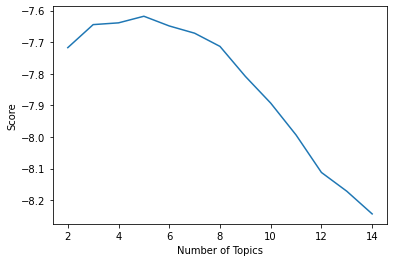

In [83]:
x = range(2,15)
plt.plot(x, values)
plt.xlabel("Number of Topics")
plt.ylabel("Score")


## Word2Vec

In [41]:
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models import word2vec

In [42]:
#기본적으로 코사인 유사도를 기반 모델만들기
embedding_model = Word2Vec(df['text_tokenized'], 
                           sg=0, window=3, min_count=5)
#sg =0은 CBOW / 1은 skip-gram
#window = 좌우2개 단어까지 학습에 적용
#min_count= 최소 3개까지 나온 단어를 학습대상으로 놓음

In [43]:
#gensim에서는 기본 유사도를 코사인 유사도를 이용
embedding_model.most_similar("추천")

<ipython-input-43-65f06e0ef13e>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  embedding_model.most_similar("추천")


[('평', 0.5685104727745056),
 ('사려', 0.5613139867782593),
 ('구입', 0.552868664264679),
 ('평이', 0.5411708354949951),
 ('성비', 0.5205351114273071),
 ('정보', 0.5114915370941162),
 ('유목민', 0.5064863562583923),
 ('구매', 0.5055205821990967),
 ('이왕이면', 0.5051418542861938),
 ('코스트코', 0.49638593196868896)]